<a href="https://colab.research.google.com/github/AlanGPT-93/Neural_Network_Np/blob/master/Neural_Network_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

## Creando set de datos

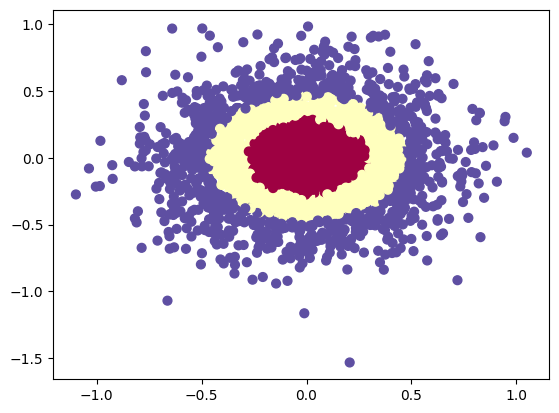

In [6]:
N = 3000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=3, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

## Función de inicialización de parámetros

In [ ]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

# Función de activación

In [ ]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

In [ ]:
x = np.linspace(10,-10,100)

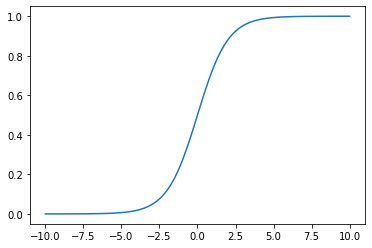

In [ ]:
plt.plot(x,sigmoid(x))

## Función de pérdida

In [ ]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)
    

In [ ]:
a = np.array([[2,3],
[2,3],
[2,3]])

In [ ]:
a.shape

(3, 2)

In [ ]:
b = np.array([[1,6,5,2],
             [1,2,7,0]])

In [ ]:
b.shape

(2, 4)

In [ ]:
np.matmul(a,b)

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

In [ ]:
a@b

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

## Función de entrenamiento

In [ ]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

## Entrenando la red

In [ ]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))
        

0.2419099769066826
0.2381143317173673
0.23203407383949906
0.22744981011399257
0.22341529484689776
0.21947620447624192
0.21530550335468182
0.21048738226437794
0.20545114140885037
0.2007080892176106
0.19601573798221242
0.19143174493811654
0.18654723549959693
0.18145361302419666
0.1763244621964169
0.1709536575703482
0.16524900750358473
0.15963848292451818
0.1534302228637245
0.14576835847126274
0.1373765210402093
0.12003597915805242
0.10110041509790435
0.09060259787364018
0.08377171274933198
0.07845945945463279
0.07387237355863158
0.0699498942578786
0.0664992894011605
0.06342656101550156
0.060756602239255525
0.058471506358222174
0.056422760160363496
0.05458658422533459
0.05303361555032129
0.05169145991903971
0.0505276097482853
0.04951009589044949
0.048614589618374705
0.04779656667617911
0.047069283777588865
0.04642837031992069
0.04581551831178234
0.04526010840310331
0.044731240097289
0.04425859992371668
0.04384901977041101
0.043461250724883056
0.043035768050282294
0.042641919870181476
0.04

0.03018948073660909
0.029267450955379772
0.030068642669354637
0.029204555723608788
0.030008302230420048
0.029175305620339757
0.029968792378305728
0.02914670987927716
0.02992976496849953
0.029115168127221147
0.029914472536552956
0.0290836647994976
0.029873234114730734
0.029025487096383928
0.02983875766350855
0.029003898933308903
0.029830464315503527
0.028999640290840057
0.029755721768399225
0.028923958756871895
0.02971594807827438
0.02888163942722755
0.029681750703673404
0.028899500481523455
0.02970307178635429
0.028841765021294145
0.02964040919838862
0.028800519698456144
0.029597716228861096
0.02879829694857949
0.029595898227470087
0.028742085533680226
0.029581900095834203
0.02866691248943554
0.029407941600210166
0.028638546978079465
0.029420315686381412
0.028669232477196317
0.029453242089520614
0.028671115872132006
0.029458410863768863
0.028636967505188203
0.029413856398311403
0.028601735339565594
0.029384602848979164
0.028578403229504383
0.029358622794074852
0.028543856420089584
0.02

0.024188679200915778
0.02450037417125582
0.023801138085877176
0.024400558877637972
0.023704182919234085
0.02444883607074819
0.023750209617602366
0.02497864960230195
0.024297590451129773
0.026214026400653963
0.025384701263609612
0.026951030552469706
0.02522572277022651
0.02672537500750468
0.025009541843148908
0.026385602088973833
0.024754671693234843
0.026041728936582954
0.02435476203841281
0.02522203388589039
0.02397676455602854
0.024786989772506294
0.02370160755256273
0.024832444702073315
0.024168928736795846
0.02641858980305694
0.024528632762980538
0.02585679774785617
0.024565536879420192
0.025740086869470317
0.024321683519644414
0.025175765985160338
0.023819104873434273
0.024593770096038345
0.02347343468608843
0.02472184170930584
0.02448558777521725
0.025328988429156648
0.024155181194569806
0.025568534417371
0.02415320185756035
0.025212735294796035
0.023912728900699717
0.02475258956297264
0.023650719811000573
0.024826879293766736
0.02411171403772848
0.02529995996133051
0.02387638514

0.020305784023576
0.021999324754750204
0.02301986359499814
0.020022121828475795
0.01896017685993278
0.018382472757152855
0.01827210108594811
0.01825848293159838
0.018789326145901064
0.019935108681328452
0.023053583709041453
0.021436943926657327
0.01978951199426811
0.01857854707349037
0.018365984768143263
0.01821127513939905
0.01855653073506148
0.01957607592158808
0.02252147404961199
0.021531504193332517
0.019954628570826388
0.01856341592598983
0.018216182291839238
0.018020857749533777
0.018086360921165216
0.018942297460372178
0.021260596647702315
0.02214210409260872
0.021367900621104465
0.01874792213851894
0.01813581693272046
0.017846640793060305
0.017832489378308065
0.01804690148009952
0.019689548751404964
0.02163784336245901
0.023390665129254685
0.019790794249338526
0.01838252763277896
0.01779574441340756
0.01764482231154588
0.01761937128094998
0.018196406426013285
0.01931229673313604
0.023066977305060604
0.022006779968070753
0.01996464885660073
0.0180864534126704
0.01764171092002446

0.016421032945446976
0.01673287992748317
0.016409620238010555
0.016720738299005656
0.016398044213180103
0.016708880738377417
0.016386998574262162
0.016697844433390133
0.016376674731822877
0.016687448817483824
0.016366456965955414
0.016676751326690754
0.016355839058479225
0.016665552308861714
0.016344914083405517
0.01665419095425584
0.016334052191615704
0.016643089215352264
0.01632349722276273
0.016632362449848857
0.016313193555759633
0.01662181059714476
0.016302921166685892
0.016611181098275786
0.016292535151319468
0.016600406506529494
0.016282066705449957
0.016589603233763392
0.016271645084115213
0.016578919138266028
0.01626135706734262
0.016568397755295075
0.016251186524736054
0.016557972999158194
0.016241054419081823
0.0165475451388852
0.016230900542101016
0.0165370864533876
0.01622073691634678
0.01652664144793374
0.01621061356371651
0.016516268918903603
0.016200566460270308
0.016505987961314736
0.016190588185468237
0.016495768132575063
0.016180645332363235
0.01648557108517181
0.016

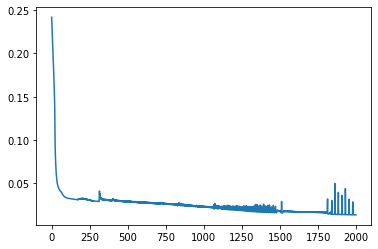

In [ ]:
plt.plot(errors)

### Probando sobre datos nuevos

In [ ]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

In [ ]:
y = np.where(y >= 0.5, 1, 0)

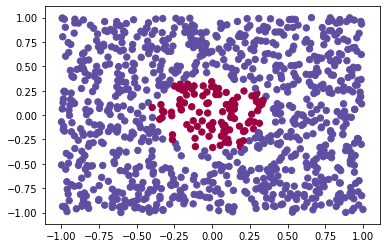

In [ ]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

## Malla de visualización

In [ ]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [ ]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

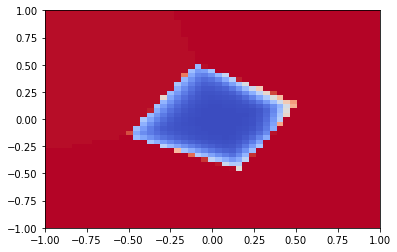

In [ ]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')